In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import SCM6
import pylaeoclim_leeds.hadcm3_processing as hcm3
import pylaeoclim_leeds.zones as zones
import cartopy.feature
import cartopy.crs as ccrs
from matplotlib import pyplot
import shapely
import itertools

## Transect

In [6]:
bounds_test = [(-5,50), (5,50), (5,40), (-5,40)]
poly_test = zones.Polygon(bounds_test)
poly_test.xy()

(array('d', [-5.0, 5.0, 5.0, -5.0, -5.0]),
 array('d', [50.0, 50.0, 40.0, 40.0, 50.0]))

In [10]:
poly_test.contain(357,49)

True

NameError: name 'lon' is not defined

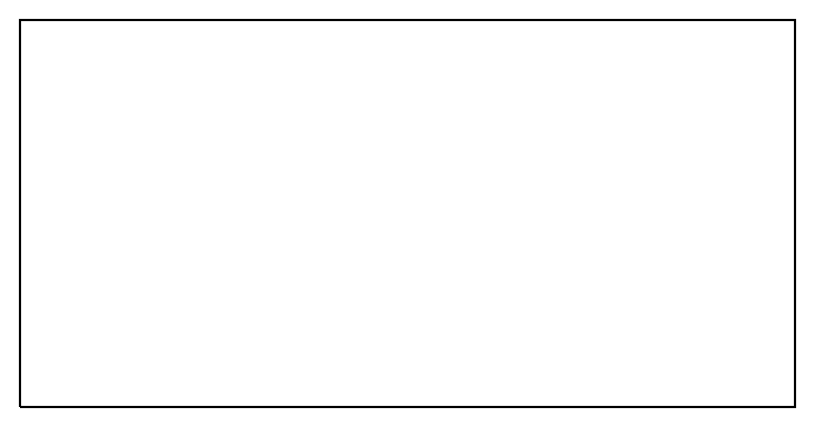

In [11]:
projection_map = ccrs.PlateCarree()

figMap, axMap = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=200, subplot_kw={'projection':projection_map})

for i in range(len(lon)):
    axMap.plot(lon[i]-180, lat[i], color='grey', linewidth=0.1)
for j in range(len(lon[0])):
    axMap.plot(lon.transpose()[j]-180, lat.transpose()[j], color='grey', linewidth=0.1)
    
axMap.plot(x, y, transform = ccrs.PlateCarree())
axMap.coastlines()
axMap.set_extent([-100,50,-90,90])
# axMap.set_global()

In [70]:
365%360

5

In [71]:
-5%360

355

In [47]:
class Polygon:
    
    def __init__(self, bounds):
        self.bounds = self.lon_range(bounds)
        self.poly = shapely.geometry.Polygon(self.bounds)
    
    def lon_range(self, bounds_in):
        bounds_out = []
        for i in range(len(bounds_in)):
            bounds_out.append((self.set_positive_lon(bounds_in[i][0]), bounds_in[i][1]))
        return bounds_out
    
    def set_positive_lon(self, lon):
        return lon+360 if lon<0 else lon
    
    def contain(self, lon, lat):
        lon, lat = self.set_positive_lon(lon), lat
        return shapely.geometry.Point(lon, lat).within(self.poly)
    
    def xy(self):
        return self.poly.exterior.coords.xy
    
    def create_mask(self, lon, lat):
        mask = np.empty((len(lat), len(lon)))
        mask[:] = np.nan
        for i in range(len(lon)):
            for j in range(len(lat)):
                if self.contain(lon[i], lat[j]):
                    mask[j,i] = 1
        return mask

In [38]:
bounds = [(-15, 75), (-35, 65), (-55,57), (-52, 45), (-55,44), (-73,40), (-77,25), (-62,18), (-57,7), (-35,-5),
          (-35,-10), (-60,-40), (-65,-55), (-55,-55), (-50,-40), (-25,-10), (-25, -5), (-47,7), (-52, 18), 
          (-67,25), (-63,40), (-45,44), (-42,45), (-45,57), (-25,65), (-5,75)]

In [39]:
poly = Polygon(bounds)
poly.xy()

[(-15, 75), (-35, 65), (-55, 57), (-52, 45), (-55, 44), (-73, 40), (-77, 25), (-62, 18), (-57, 7), (-35, -5), (-35, -10), (-60, -40), (-65, -55), (-55, -55), (-50, -40), (-25, -10), (-25, -5), (-47, 7), (-52, 18), (-67, 25), (-63, 40), (-45, 44), (-42, 45), (-45, 57), (-25, 65), (-5, 75)]


(array('d', [345.0, 325.0, 305.0, 308.0, 305.0, 287.0, 283.0, 298.0, 303.0, 325.0, 325.0, 300.0, 295.0, 305.0, 310.0, 335.0, 335.0, 313.0, 308.0, 293.0, 297.0, 315.0, 318.0, 315.0, 335.0, 355.0, 345.0]),
 array('d', [75.0, 65.0, 57.0, 45.0, 44.0, 40.0, 25.0, 18.0, 7.0, -5.0, -10.0, -40.0, -55.0, -55.0, -40.0, -10.0, -5.0, 7.0, 18.0, 25.0, 40.0, 44.0, 45.0, 57.0, 65.0, 75.0, 75.0]))

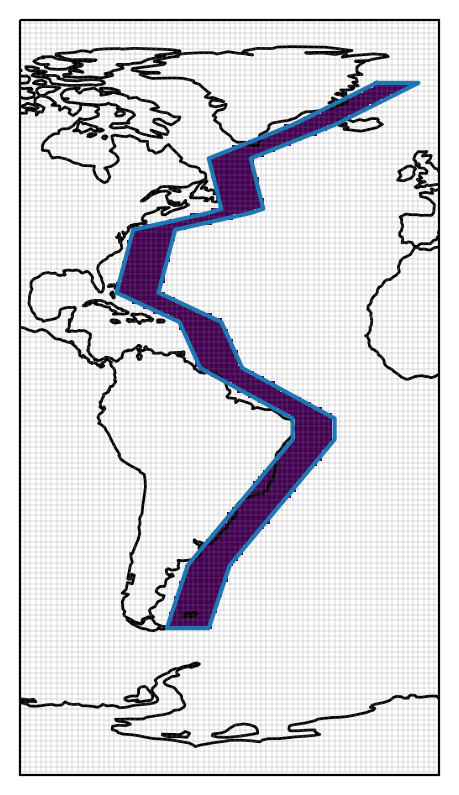

In [68]:
projection_map = ccrs.PlateCarree()

figMap, axMap = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=200, subplot_kw={'projection':projection_map})

for i in range(len(lon)):
    axMap.plot(lon[i]-180, lat[i], color='grey', linewidth=0.1)
for j in range(len(lon[0])):
    axMap.plot(lon.transpose()[j]-180, lat.transpose()[j], color='grey', linewidth=0.1)
    
axMap.plot(x, y, transform = ccrs.PlateCarree())
axMap.coastlines()
axMap.set_extent([-100,0,-90,90])
# axMap.set_global()
axMap.pcolormesh(lon_ocn, lat_ocn, mask, transform=ccrs.PlateCarree())

### Latitude transect

/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


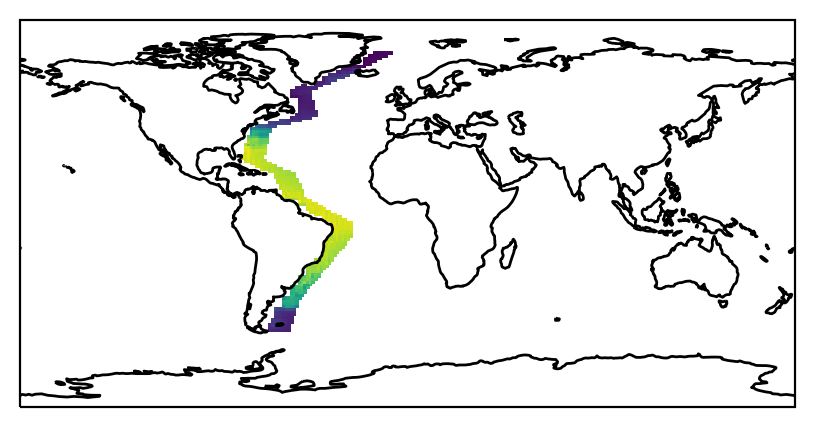

In [220]:
projection_map = ccrs.PlateCarree()
figMap, axMap = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=200, subplot_kw={'projection':projection_map})

axMap.pcolormesh(lon_ocn, lat_ocn, sst.values()*mask)
axMap.coastlines()
axMap.set_global()

In [221]:
print((sst.values()*mask).shape)
print(lon_ocn.shape)

/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(145, 289)
(289,)


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-222-35c17a7cec49>:1: RuntimeWarning: Mean of empty slice
  plt.plot(lat_ocn, np.nanmean(sst.values()*mask, axis=1))


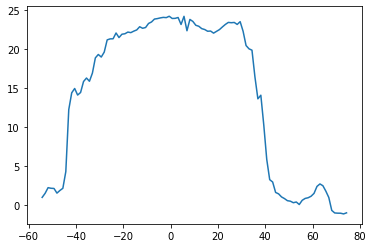

In [222]:
plt.plot(lat_ocn, np.nanmean(sst.values()*mask, axis=1))

In [223]:
mask3D = np.resize(mask, temp.values().shape)

/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [224]:
print((temp.values()*mask3D).shape)
print(lon_ocn.shape)

(20, 145, 289)
(289,)


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-226-5f61740442a8>:1: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(lat_ocn, temp.zb_p, np.nanmean(temp.values()*mask3D, axis=2))
<ipython-input-226-5f61740442a8>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['p

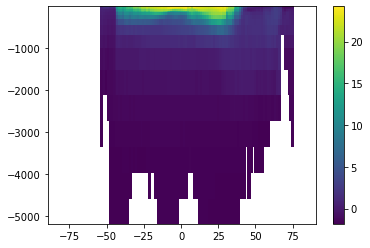

In [226]:
plt.pcolormesh(lat_ocn, temp.zb_p, np.nanmean(temp.values()*mask3D, axis=2))
plt.colorbar()

In [210]:
temp.z_p

array([-359.4, -242.6, -164.8, -113. ,  -78.5,  -55.5,  -40.2,  -30. ,
        -20. ,  -10. ], dtype=float32)

### ATMSURFDS

In [2]:
zone_na = zones.Box(lon_min=310, lon_max=340, lat_min=50, lat_max=70)
zone_n = zones.Box(lon_min=310, lat_min=50)

In [3]:
sat = hcm3.ATMSURFMDS('xosfb', 3000, 3010).sat(mode_t='mean', zone=zone_na)
sat

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMSURFMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: [311.25; 315.0; ...; 333.75; 337.5; 8]; lon_p: [311.25; 315.0; ...; 333.75; 337.5; 8]
lonb: [313.125; 316.875; ...; 335.625; 339.375; 8]; lonb_p: [313.125; 316.875; ...; 335.625; 339.375; 8]
lons: [3.75; 3.75; ...; 3.75; 3.75; 12]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 12]
lat: [50.0; 52.5; ...; 67.5; 70.0; 9]; lat_p: [50.0; 52.5; ...; 67.5; 70.0; 9]
latb: [51.25; 53.75; ...; 66.25; 68.75; 8]; latb_p: [48.75; 51.25; ...; 63.75; 66.25; 8]
lats: [2.5; 2.5; ...; 2.5; 2.5; 15]; lats_p: [2.5; 2.5; ...; 2.5; 2.5; 15]
z: None; z_p: None
zb: None; zb_p: None
zs: None; zs_p: None
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.DataArray 'temp_mm_srf' (latitude: 9, longitude: 8)>
array([[249.81143, 252.88933, 255.80878, 257.9481 , 260.06473, 262.3618 ,
        264.32178, 266.31885],
       [247.96062, 251.20653, 254.10825, 256.34357, 258.5687 , 260.8615 ,
        262.7806 , 265.0222 ],
       [247.62212, 250.80063, 253.02885, 2

In [4]:
sat = hcm3.ATMSURFMDS('xosfb', 3000, 3010).sat(mode_t='mean', zone=zone_n)
sat

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMSURFMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: [311.25; 315.0; ...; 352.5; 356.25; 13]; lon_p: [311.25; 315.0; ...; 352.5; 356.25; 13]
lonb: [313.125; 316.875; ...; 354.375; 358.125; 13]; lonb_p: [313.125; 316.875; ...; 354.375; 358.125; 13]
lons: [3.75; 3.75; ...; 3.75; 3.75; 95]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 96]
lat: [50.0; 52.5; ...; 87.5; 90.0; 17]; lat_p: [50.0; 52.5; ...; 87.5; 90.0; 17]
latb: [51.25; 53.75; ...; 86.25; 88.75; 16]; latb_p: [48.75; 51.25; ...; 83.75; 86.25; 16]
lats: [2.5; 2.5; ...; 2.5; 2.5; 71]; lats_p: [1.25; 2.5; ...; 2.5; 2.5; 73]
z: None; z_p: None
zb: None; zb_p: None
zs: None; zs_p: None
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.DataArray 'temp_mm_srf' (latitude: 17, longitude: 13)>
array([[249.81143, 252.88933, 255.80878, 257.9481 , 260.06473, 262.3618 ,
        264.32178, 266.31885, 268.70447, 271.42053, 271.5078 , 271.03333,
        268.3082 ],
       [247.96062, 251.20653, 254.10825, 256.34357, 258.5687 , 260.8615 ,

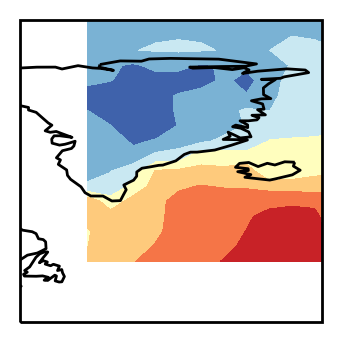

In [8]:
projection = ccrs.PlateCarree()

figMap = plt.figure(figsize=(2,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1, projection=projection)

cm = axMap.contourf(sat.lon_p, sat.lat_p, sat.values(), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axMap.coastlines()
axMap.set_extent([300, 350, 40, 90])

### ATMUPDS

In [12]:
zone_na = zones.Box(lon_min=310, lon_max=340, lat_min=50, lat_max=70, z_min=30, z_max=100)
zone_n = zones.Box(lon_min=310, lat_min=50, z_min=30)

In [13]:
temperature = hcm3.ATMUPMDS('xosfb', 3000, 3010).temperature(mode_t='mean', zone=zone_na)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMUPMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing atmosphere temperaure.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: [313.125; 316.875; ...; 335.625; 339.375; 8]; lon_p: [313.125; 316.875; ...; 335.625; 339.375; 8]
lonb: [311.25; 315.0; ...; 333.75; 337.5; 8]; lonb_p: [311.25; 315.0; ...; 333.75; 337.5; 8]
lons: [3.75; 3.75; ...; 3.75; 3.75; 12]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 12]
lat: [51.25; 53.75; ...; 66.25; 68.75; 8]; lat_p: [48.75; 51.25; ...; 63.75; 66.25; 8]
latb: [50.0; 52.5; ...; 67.5; 70.0; 9]; latb_p: [50.0; 52.5; ...; 67.5; 70.0; 9]
lats: [2.5; 2.5; ...; 2.5; 2.5; 16]; lats_p: [2.5; 2.5; ...; 2.5; 2.5; 16]
z: [30.0; 50.0; ...; 70.0; 100.0; 4]; z_p: [30.0; 50.0; ...; 70.0; 100.0; 4]
zb: [40.0; 55.0; ...; 55.0; 75.0; 3]; zb_p: [40.0; 55.0; ...; 55.0; 75.0; 3]
zs: [15.0; 20.0; ...; 75.0; 75.0; 14]; zs_p: [15.0; 20.0; ...; 75.0; 75.0; 14]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.DataArray 'temp_mm_p' (z: 4, latitudeb: 9, longitudeb: 8)>
array([[[223.67276, 223.71492, 223.60875, 223.55933, 223.51736,
         2

In [14]:
temperature = hcm3.ATMUPMDS('xosfb', 3000, 3010).temperature(mode_t='mean', zone=zone_n)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMUPMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing atmosphere temperaure.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: [313.125; 316.875; ...; 354.375; 358.125; 13]; lon_p: [313.125; 316.875; ...; 354.375; 358.125; 13]
lonb: [311.25; 315.0; ...; 352.5; 356.25; 13]; lonb_p: [311.25; 315.0; ...; 352.5; 356.25; 13]
lons: [3.75; 3.75; ...; 3.75; 3.75; 95]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 96]
lat: [51.25; 53.75; ...; 86.25; 88.75; 16]; lat_p: [48.75; 51.25; ...; 83.75; 86.25; 16]
latb: [50.0; 52.5; ...; 87.5; 90.0; 17]; latb_p: [50.0; 52.5; ...; 87.5; 90.0; 17]
lats: [2.5; 2.5; ...; 2.5; 2.5; 72]; lats_p: [2.5; 2.5; ...; 2.5; 2.5; 72]
z: [30.0; 50.0; ...; 925.0; 1000.0; 15]; z_p: [30.0; 50.0; ...; 925.0; 1000.0; 15]
zb: [40.0; 55.0; ...; 962.5; 1037.5; 15]; zb_p: [40.0; 55.0; ...; 962.5; 1037.5; 15]
zs: [10.0; 5.0; ...; 75.0; 75.0; 17]; zs_p: [10.0; 5.0; ...; 75.0; 75.0; 17]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.DataArray 'temp_mm_p' (z: 15, latitudeb: 17, longitudeb: 13)>
array([[[223.67276, 223.71492, 223.60875, ..., 222.

## OCNMDS

In [15]:
zone_na = zones.Box(lon_min=310, lon_max=340, lat_min=50, lat_max=70, z_min=-205, z_max=-30)
zone_n = zones.Box(lon_min=310, lat_min=50, z_min=-205)

In [16]:
sst = hcm3.OCNMDS('xosfb', 3000, 3010).sst(mode_t='mean', zone=zone_na)
sst

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SST.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lon: [310.0; 311.25; ...; 338.75; 340.0; 25]; lon_p: [310.0; 311.25; ...; 338.75; 340.0; 25]
lonb: [310.625; 311.875; ...; 338.125; 339.375; 24]; lonb_p: [310.625; 311.875; ...; 338.125; 339.375; 24]
lons: [1.25; 1.25; ...; 1.25; 1.25; 39]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 39]
lat: [50.625; 51.875; ...; 68.125; 69.375; 16]; lat_p: [50.625; 51.875; ...; 68.125; 69.375; 16]
latb: [50.0; 51.25; ...; 68.75; 70.0; 17]; latb_p: [48.75; 50.0; ...; 67.5; 68.75; 17]
lats: [1.25; 1.25; ...; 1.25; 1.25; 31]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 31]
z: [-164.8000030517578; -113.0; ...; -40.20000076293945; -30.0; 6]; z_p: [-164.8000030517578; -113.0; ...; -40.20000076293945; -30.0; 6]
zb: [-203.6999969482422; -138.89999389648438; ...; -47.849998474121094; -35.099998474121094; 6]; zb_p: [-301.0; -203.6999969482422; ...; -67.0; -47.849998474121094; 6]
zs: [64.80000305175781; 43.149993896484375; ...; 10.0; 10.0; 8]; zs_p: [97.30000305175781; 64.80000305175781; ...; 10.099998474121094; 10.0; 8]
t

In [17]:
sst = hcm3.OCNMDS('xosfb', 3000, 3010).sst(mode_t='mean', zone=zone_n)
sst

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SST.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lon: [310.0; 311.25; ...; 357.5; 358.75; 40]; lon_p: [310.0; 311.25; ...; 357.5; 358.75; 40]
lonb: [310.625; 311.875; ...; 358.125; 359.375; 40]; lonb_p: [310.625; 311.875; ...; 358.125; 359.375; 40]
lons: [1.25; 1.25; ...; 1.25; 1.25; 287]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 288]
lat: [50.625; 51.875; ...; 88.125; 89.375; 32]; lat_p: [50.625; 51.875; ...; 88.125; 89.375; 32]
latb: [50.0; 51.25; ...; 87.5; 88.75; 32]; latb_p: [48.75; 50.0; ...; 86.25; 87.5; 32]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-164.8000030517578; -113.0; ...; -20.0; -10.0; 8]; z_p: [-164.8000030517578; -113.0; ...; -20.0; -10.0; 8]
zb: [-203.6999969482422; -138.89999389648438; ...; -15.0; -5.0; 9]; zb_p: [-301.0; -203.6999969482422; ...; -25.0; -15.0; 9]
zs: [97.30000305175781; 64.80000305175781; ...; 10.0; 10.0; 9]; zs_p: [116.79998779296875; 97.30000305175781; ...; 10.0; 10.0; 10]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12

## OCNYDS

In [18]:
zone_na = zones.Box(lon_min=310, lon_max=340, lat_min=50, lat_max=70, z_min=-205, z_max=-30)
zone_n = zones.Box(lon_min=310, lat_min=50, z_min=-205)

In [19]:
temperature = hcm3.OCNMDS('xosfb', 3000, 3010).temperature(mode_t='mean', zone=zone_na)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing temperature.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: [310.0; 311.25; ...; 338.75; 340.0; 25]; lon_p: [310.0; 311.25; ...; 338.75; 340.0; 25]
lonb: [310.625; 311.875; ...; 338.125; 339.375; 24]; lonb_p: [310.625; 311.875; ...; 338.125; 339.375; 24]
lons: [1.25; 1.25; ...; 1.25; 1.25; 39]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 39]
lat: [50.625; 51.875; ...; 68.125; 69.375; 16]; lat_p: [50.625; 51.875; ...; 68.125; 69.375; 16]
latb: [50.0; 51.25; ...; 68.75; 70.0; 17]; latb_p: [48.75; 50.0; ...; 67.5; 68.75; 17]
lats: [1.25; 1.25; ...; 1.25; 1.25; 31]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 31]
z: [-164.8000030517578; -113.0; ...; -40.20000076293945; -30.0; 6]; z_p: [-164.8000030517578; -113.0; ...; -40.20000076293945; -30.0; 6]
zb: [-203.6999969482422; -138.89999389648438; ...; -47.849998474121094; -35.099998474121094; 6]; zb_p: [-301.0; -203.6999969482422; ...; -67.0; -47.849998474121094; 6]
zs: [64.80000305175781; 43.149993896484375; ...; 10.0; 10.0; 8]; zs_p: [97.30000305175781; 64.80000305175781; ...; 10.099998474121094; 10.0; 8]
t

In [20]:
temperature = hcm3.OCNMDS('xosfb', 3000, 3010).temperature(mode_t='mean', zone=zone_n)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing temperature.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lon: [310.0; 311.25; ...; 357.5; 358.75; 40]; lon_p: [310.0; 311.25; ...; 357.5; 358.75; 40]
lonb: [310.625; 311.875; ...; 358.125; 359.375; 40]; lonb_p: [310.625; 311.875; ...; 358.125; 359.375; 40]
lons: [1.25; 1.25; ...; 1.25; 1.25; 287]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 288]
lat: [50.625; 51.875; ...; 88.125; 89.375; 32]; lat_p: [50.625; 51.875; ...; 88.125; 89.375; 32]
latb: [50.0; 51.25; ...; 87.5; 88.75; 32]; latb_p: [48.75; 50.0; ...; 86.25; 87.5; 32]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-164.8000030517578; -113.0; ...; -20.0; -10.0; 8]; z_p: [-164.8000030517578; -113.0; ...; -20.0; -10.0; 8]
zb: [-203.6999969482422; -138.89999389648438; ...; -15.0; -5.0; 9]; zb_p: [-301.0; -203.6999969482422; ...; -25.0; -15.0; 9]
zs: [97.30000305175781; 64.80000305175781; ...; 10.0; 10.0; 9]; zs_p: [116.79998779296875; 97.30000305175781; ...; 10.0; 10.0; 10]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12